In [ ]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).
---

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data for ML projects/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).
---

In [ ]:
df.shape[0] #size of ds

32561

In [ ]:
df.shape[1] #number of features

15

In [ ]:
df.dtypes #features types

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
df.income #target feature

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

Our goal os to make a binary classification model
---

Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
---

исследование шкалы измерения каждого существенного признака;

In [ ]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


I suggest that fnlwgt, martial-status and race doesn`t influence on income, that is why excelude them

In [ ]:
df.drop(labels = ['fnlwgt', 'marital-status', 'race'], axis=1, inplace=True)

Categorical features

In [ ]:
for feature in df.columns:
  if type(df[feature][0]) == str:
    print(f'{feature.upper()}: {np.sort(df[feature].unique())}')
    print()

WORKCLASS: [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']

EDUCATION: [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']

OCCUPATION: [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']

RELATIONSHIP: [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

SEX: [' Female' ' Male']

NATIVE-COUNTRY: [' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' 

Numeric features

In [ ]:
for feature in df.columns:
  if type(df[feature][0]) != str:
    print(f'{feature.upper()}: {np.sort(df[feature].unique())}')
    print()

AGE: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]

EDUCATION-NUM: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

CAPITAL-GAIN: [    0   114   401   594   914   991  1055  1086  1111  1151  1173  1409
  1424  1455  1471  1506  1639  1797  1831  1848  2009  2036  2050  2062
  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387  2407  2414
  2463  2538  2580  2597  2635  2653  2829  2885  2907  2936  2961  2964
  2977  2993  3103  3137  3273  3325  3411  3418  3432  3456  3464  3471
  3674  3781  3818  3887  3908  3942  4064  4101  4386  4416  4508  4650
  4687  4787  4865  4931  4934  5013  5060  5178  5455  5556  5721  6097
  6360  6418  6497  6514  6723  6767  6849  7298  7430  7443  7688  7896
  7978  8614  9386  9562 10520 10566 10605 11678 13550 14084 14344 15020
 15024 15831 18481 20051 22040 25

In [ ]:
df.shape[1]

12

We have only 11 features and 1 target feature, now we can start to preprocess data

построение эмпирического распределения каждого существенного признака;
---

Numerical columns

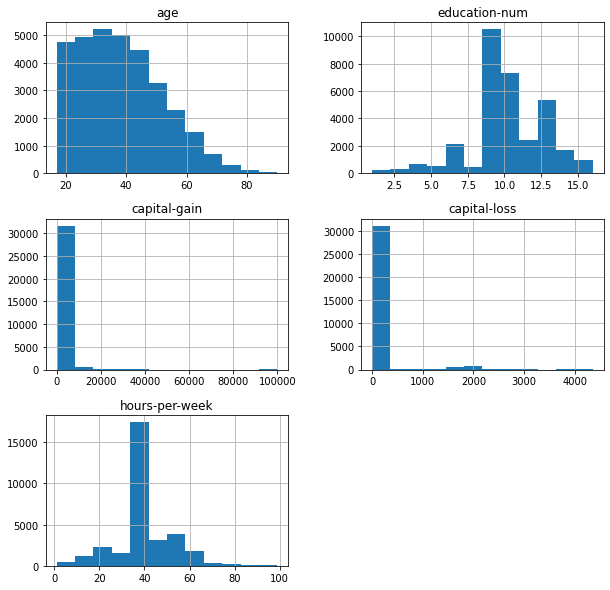

In [ ]:
ax = df.hist(bins=12, figsize=(10,10))
None

We need to fix capital gain, hours-per-week

In [ ]:
num_cols = []
cat_cols = []
for feature in df.columns:
  if type(df[feature][0]) == str:
    cat_cols.append(feature)
  else:
    num_cols.append(feature)
print(num_cols)
print()
print(cat_cols)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

['workclass', 'education', 'occupation', 'relationship', 'sex', 'native-country', 'income']


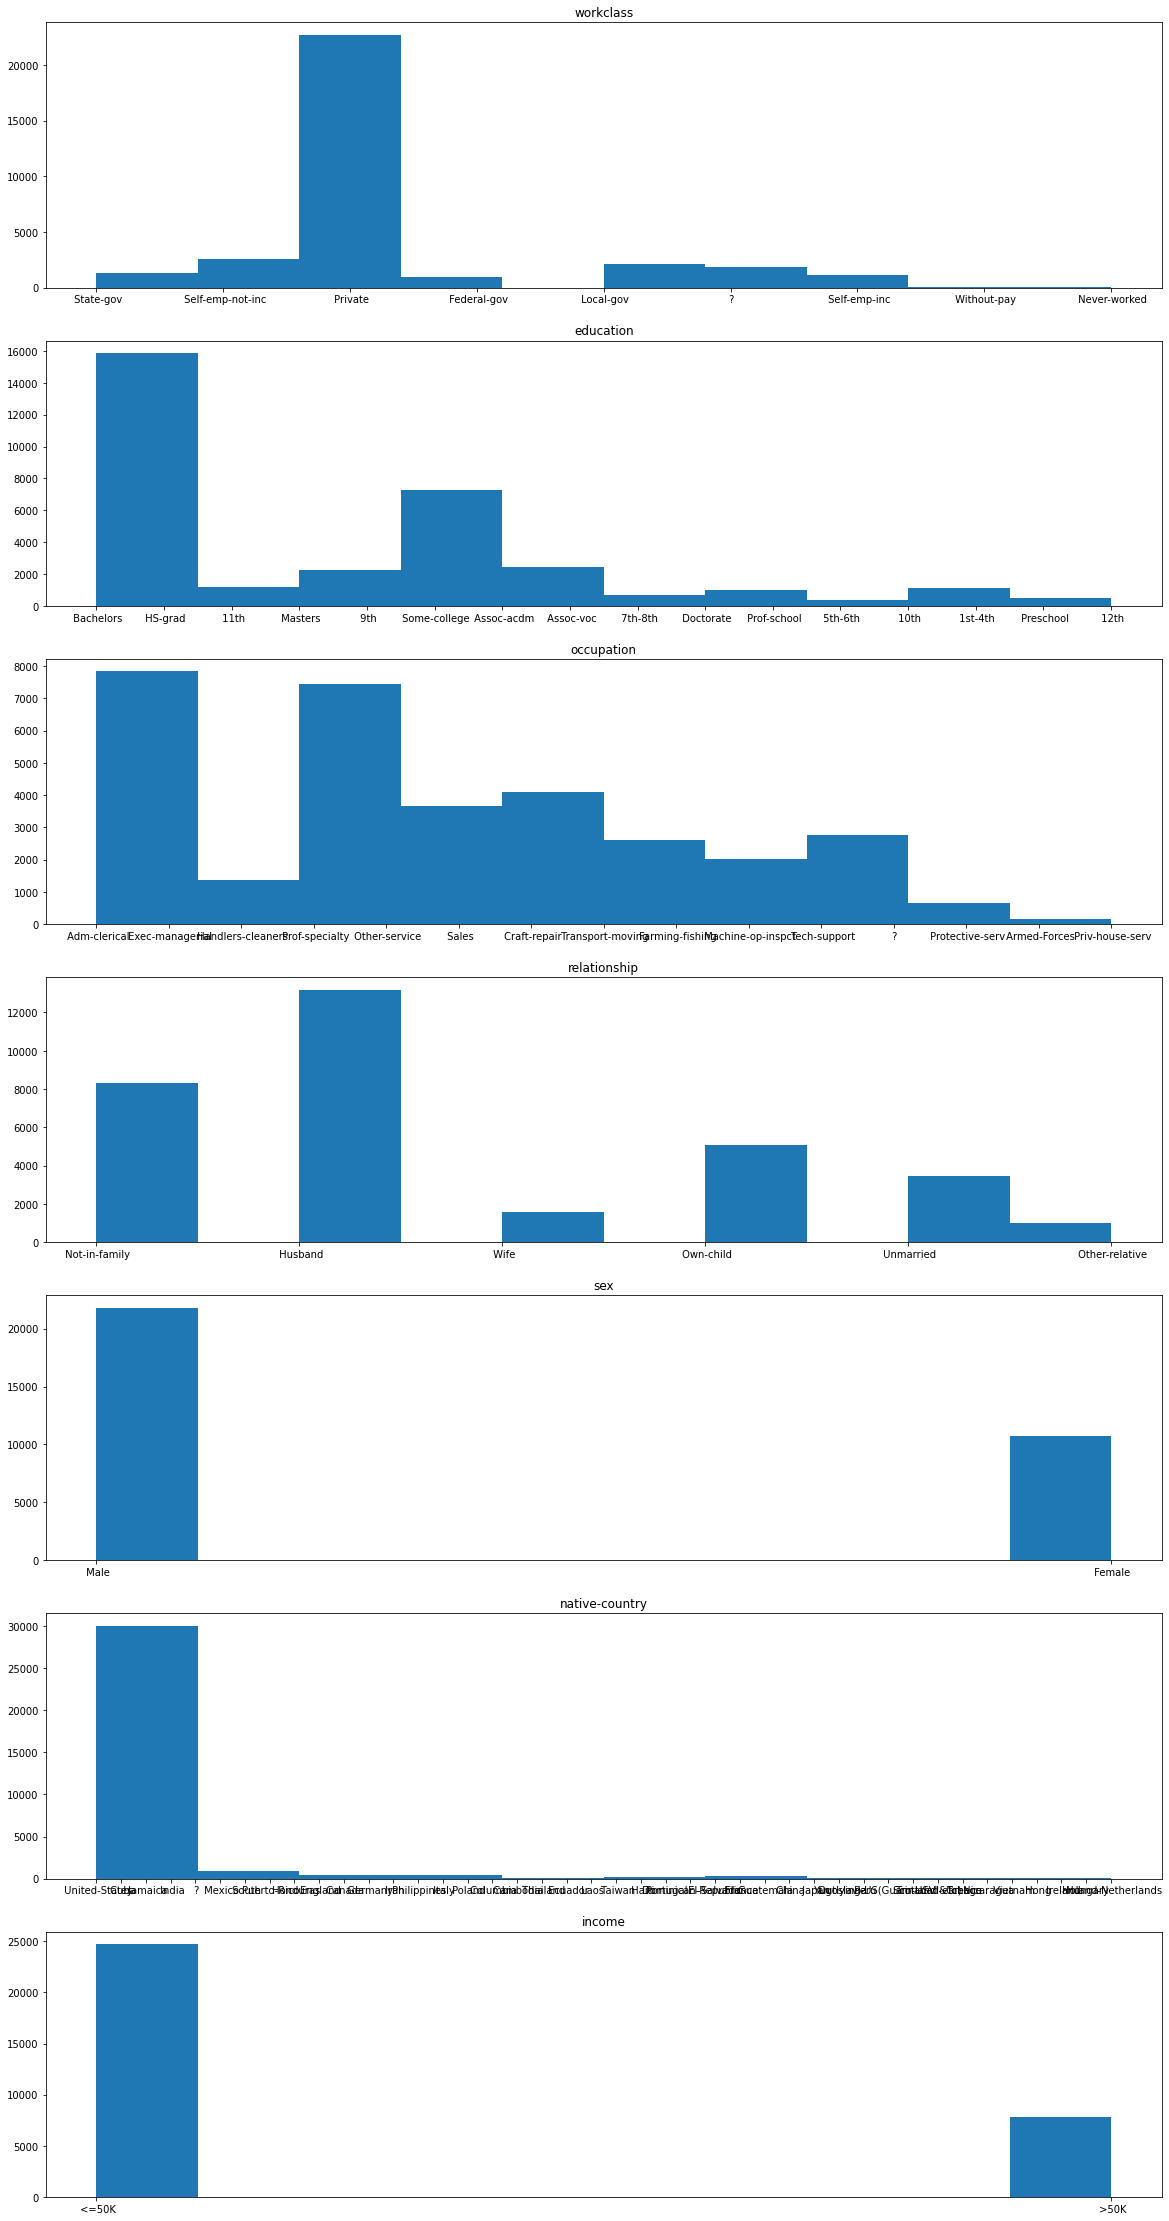

In [ ]:
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(20,40))
for i in range(len(cat_cols)):
  ax[i].hist(df[cat_cols[i]])
  ax[i].set_title(cat_cols[i])

Native-Country contains not onlu USA, so we can just delete another values, it isn\`t affect on the result


Target feature isn`t balance so we need to fix this

Another feature may be with such distribution, so we shouldn\`t fix them

анализ количества и распределения отсутствующих значений;
---
Провести подготовительную обработку данных, включающую следующие шаги: 6. удаление или заполнение отсутствующих значений; 7. приведение всех признаков к бинарной либо числовой шкале; 8. удаление несущественных либо избыточных признаков; 9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).
---

Categorical features preproccesing

In [ ]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Work class preproccesing

In [ ]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df.workclass.mode()

0     Private
dtype: object

In [ ]:
rep = df.workclass.mode()
df['workclass'] = df['workclass'].replace([' ?'], rep)

In [ ]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

Occupation preproccesing

In [ ]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
rep = df.occupation.mode()
df['occupation'] = df['occupation'].replace([' ?'], rep)

In [ ]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Native country preproccesing

In [ ]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df.drop(df[df['native-country']!= ' United-States'].index, axis=0, inplace=True)

In [ ]:
df['native-country'].unique()

array([' United-States'], dtype=object)

Due to the fact this column has only one unique values, we can delete it

In [ ]:
df.drop(labels='native-country', axis=1, inplace=True)

In [ ]:
df.shape[1]

11

In [ ]:
df.head(1)

,age,workclass,education,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,Bachelors,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K


Numerical features preproccesing

In [ ]:
num_cols

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
df['capital-gain']

0         2174
1            0
2            0
3            0
5            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital-gain, Length: 29170, dtype: int64

In [ ]:
df[df['capital-gain'] == 0].shape[0]

26699

It\`s easy to understand and explain, I didn\`t see any options to fix this column

In [ ]:
df['hours-per-week'].nunique()

94

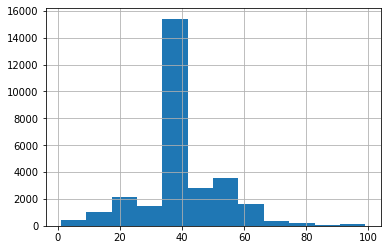

In [ ]:
df['hours-per-week'].hist(bins=12)

Most people work 40 hours a week, it isn`t anomalia

End of preproccesing

построение совместного распределения каждого признака и целевой переменной;
---
построение корреляционной матрицы.
---

Before calculate union distribution, let\`s encode all cat_cols

In [ ]:
cat_cols.remove('native-country')

In [ ]:
cat_cols

['workclass', 'education', 'occupation', 'relationship', 'sex', 'income']

In [ ]:
from sklearn import preprocessing

for feature in cat_cols:
  enc = preprocessing.LabelEncoder()
  enc.fit(df[feature])
  df[feature] = enc.transform(df[feature]) + 1
df.head()

,age,workclass,education,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,7,10,13,1,2,2,2174,0,40,1
1,50,6,10,13,4,1,2,0,0,13,1
2,38,4,12,9,6,2,2,0,0,40,1
3,53,4,2,7,6,1,2,0,0,40,1
5,37,4,13,14,4,6,1,0,0,40,1


In [ ]:
df.income.unique()

array([1, 2])

Now we encoded all the categorical columns and can start to make a corr matrix

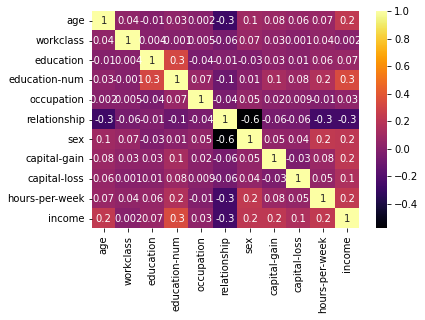

In [ ]:
sns.heatmap(df.corr(), fmt='.0g', annot=True, cmap='inferno')
None

As for the income most valuable features is age, education-num, relationship, sex, capital-gain, hours-per-week


So let\`s delete workclass, education and occupation

In [ ]:
df.drop(labels = ['workclass', 'education', 'occupation'], axis=1, inplace=True)

In [ ]:
df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,2,2,2174,0,40,1
1,50,13,1,2,0,0,13,1
2,38,9,2,2,0,0,40,1
3,53,7,1,2,0,0,40,1
5,37,14,6,1,0,0,40,1


По каждому пункту анализа необходимо сделать содержательный вывод.
---

Количественные характеристики датасета необходимо также привести после его обработки.
---

In [ ]:
df.columns

Index(['age', 'education-num', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

In [ ]:
df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week
0,39,13,2,2,2174,0,40
1,50,13,1,2,0,0,13
2,38,9,2,2,0,0,40
3,53,7,1,2,0,0,40
5,37,14,6,1,0,0,40


Categorical features is relationship, sex and income

Использовать несколько моделей машинного обучения для решения поставленной задачи.
---

In [ ]:
from sklearn.model_selection import train_test_split
y = df.income
df.drop(labels = ['income'], axis=1, inplace=True)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

SVC with poly kernel

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = SVC(kernel = 'poly')
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 10.246444463729858

Accuracy for training data 0.7762255742200891
Precision for training data  0.8222067356816696
Recall for training data 0.7762255742200891
f1-score for training data 0.8707105719237436

Accuracy for test data: 0.7781967775111416
Precision for test data  0.8268841874192765
Recall for test data 0.7781967775111416
f1-score for test data 0.8718558130322837



Logistic Regression

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

t0 = time.time()

classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 1.1788132190704346

Accuracy for training data 0.8216061021597532
Precision for training data  0.8106421612104632
Recall for training data 0.8216061021597532
f1-score for training data 0.8886928157001149

Accuracy for test data: 0.8236201576962633
Precision for test data  0.8128814683533413
Recall for test data 0.8236201576962633
f1-score for test data 0.8898640693567377



KNN

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 0.03900265693664551

Accuracy for training data 0.8740572505999314
Precision for training data  0.8704102636373019
Recall for training data 0.8740572505999314
f1-score for training data 0.9180903542264709

Accuracy for test data: 0.8368186492972232
Precision for test data  0.8309638779139769
Recall for test data 0.8368186492972232
f1-score for test data 0.8941281138790036



Tree decision classifier

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 0.2366631031036377

Accuracy for training data 0.9227802536852932
Precision for training data  0.9221650364379238
Recall for training data 0.9227802536852932
f1-score for training data 0.9501355913442914

Accuracy for test data: 0.8308193349331505
Precision for test data  0.8243060186754515
Recall for test data 0.8308193349331505
f1-score for test data 0.8903942254303164

